In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
df=pd.read_csv("./StudentsPerformanceTest.csv")
df

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.0,1,Pune
1,female,69,90,88.0,NaN,2,na
2,female,90,95,93.0,74.0,2,Nashik
3,male,47,57,NaN,78.0,1,Na
4,male,na,78,75.0,81.0,3,Pune
5,female,71,Na,78.0,70.0,4,na
6,male,12,44,52.0,12.0,2,Nashik
7,male,NaN,65,67.0,49.0,1,Pune
8,male,5,77,89.0,55.0,0,NaN


1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or inconsistencies, use any of the suitable techniques to deal with them.

In [7]:
df.isnull()

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False
8,False,False,False,False,False,False,True


In [8]:
df.isnull().sum()

gender                   0
math score               1
reading score            0
writing score            1
Placement Score          1
placement offer count    0
Region                   1
dtype: int64

In [9]:
series = pd.isnull(df["math score"])
df[series]

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
7,male,NaN,65,67.0,49.0,1,Pune


In [10]:
series1 = pd.notnull(df["math score"])
df[series1]

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.0,1,Pune
1,female,69,90,88.0,NaN,2,na
2,female,90,95,93.0,74.0,2,Nashik
3,male,47,57,NaN,78.0,1,Na
4,male,na,78,75.0,81.0,3,Pune
5,female,71,Na,78.0,70.0,4,na
6,male,12,44,52.0,12.0,2,Nashik
8,male,5,77,89.0,55.0,0,NaN


LabelEncoder is a class in sklearn.preprocessing that converts categorical (text) labels into numeric values.

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df["gender"])
newdf = df

In [15]:
df

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,0,72,72,74.0,78.0,1,Pune
1,0,69,90,88.0,NaN,2,na
2,0,90,95,93.0,74.0,2,Nashik
3,1,47,57,NaN,78.0,1,Na
4,1,na,78,75.0,81.0,3,Pune
5,0,71,Na,78.0,70.0,4,na
6,1,12,44,52.0,12.0,2,Nashik
7,1,NaN,65,67.0,49.0,1,Pune
8,1,5,77,89.0,55.0,0,NaN


In [17]:
missing_values = ["Na","na"]
df = pd.read_csv("./StudentsPerformanceTest.csv", na_values = missing_values)
df

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.0,72.0,74.0,78.0,1,Pune
1,female,69.0,90.0,88.0,NaN,2,NaN
2,female,90.0,95.0,93.0,74.0,2,Nashik
3,male,47.0,57.0,NaN,78.0,1,NaN
4,male,NaN,78.0,75.0,81.0,3,Pune
5,female,71.0,NaN,78.0,70.0,4,NaN
6,male,12.0,44.0,52.0,12.0,2,Nashik
7,male,NaN,65.0,67.0,49.0,1,Pune
8,male,5.0,77.0,89.0,55.0,0,NaN


In [18]:
ndf = df
ndf.fillna(0)

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.0,72.0,74.0,78.0,1,Pune
1,female,69.0,90.0,88.0,0.0,2,0
2,female,90.0,95.0,93.0,74.0,2,Nashik
3,male,47.0,57.0,0.0,78.0,1,0
4,male,0.0,78.0,75.0,81.0,3,Pune
5,female,71.0,0.0,78.0,70.0,4,0
6,male,12.0,44.0,52.0,12.0,2,Nashik
7,male,0.0,65.0,67.0,49.0,1,Pune
8,male,5.0,77.0,89.0,55.0,0,0


In [19]:
m_v = df['math score'].mean()
df['math score'].fillna(value = m_v, inplace=True)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_3536\789429003.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math score'].fillna(value = m_v, inplace=True)


,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.000000,72.0,74.0,78.0,1,Pune
1,female,69.000000,90.0,88.0,NaN,2,NaN
2,female,90.000000,95.0,93.0,74.0,2,Nashik
3,male,47.000000,57.0,NaN,78.0,1,NaN
4,male,52.285714,78.0,75.0,81.0,3,Pune
5,female,71.000000,NaN,78.0,70.0,4,NaN
6,male,12.000000,44.0,52.0,12.0,2,Nashik
7,male,52.285714,65.0,67.0,49.0,1,Pune
8,male,5.000000,77.0,89.0,55.0,0,NaN


In [20]:
me_v = df['reading score'].median()
df['reading score'].fillna(value = me_v, inplace=True)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_3536\116083509.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reading score'].fillna(value = me_v, inplace=True)


,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.000000,72.0,74.0,78.0,1,Pune
1,female,69.000000,90.0,88.0,NaN,2,NaN
2,female,90.000000,95.0,93.0,74.0,2,Nashik
3,male,47.000000,57.0,NaN,78.0,1,NaN
4,male,52.285714,78.0,75.0,81.0,3,Pune
5,female,71.000000,74.5,78.0,70.0,4,NaN
6,male,12.000000,44.0,52.0,12.0,2,Nashik
7,male,52.285714,65.0,67.0,49.0,1,Pune
8,male,5.000000,77.0,89.0,55.0,0,NaN


In [21]:
std_v = df['writing score'].std()
df['writing score'].fillna(value  = std_v, inplace=True)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_3536\3445907653.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['writing score'].fillna(value  = std_v, inplace=True)


,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.000000,72.0,74.000000,78.0,1,Pune
1,female,69.000000,90.0,88.000000,NaN,2,NaN
2,female,90.000000,95.0,93.000000,74.0,2,Nashik
3,male,47.000000,57.0,13.416408,78.0,1,NaN
4,male,52.285714,78.0,75.000000,81.0,3,Pune
5,female,71.000000,74.5,78.000000,70.0,4,NaN
6,male,12.000000,44.0,52.000000,12.0,2,Nashik
7,male,52.285714,65.0,67.000000,49.0,1,Pune
8,male,5.000000,77.0,89.000000,55.0,0,NaN


In [22]:
min_v = df['Placement Score'].min()
df['Placement Score'].fillna(value  = min_v, inplace=True)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_3536\1702481991.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Placement Score'].fillna(value  = min_v, inplace=True)


,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.000000,72.0,74.000000,78.0,1,Pune
1,female,69.000000,90.0,88.000000,12.0,2,NaN
2,female,90.000000,95.0,93.000000,74.0,2,Nashik
3,male,47.000000,57.0,13.416408,78.0,1,NaN
4,male,52.285714,78.0,75.000000,81.0,3,Pune
5,female,71.000000,74.5,78.000000,70.0,4,NaN
6,male,12.000000,44.0,52.000000,12.0,2,Nashik
7,male,52.285714,65.0,67.000000,49.0,1,Pune
8,male,5.000000,77.0,89.000000,55.0,0,NaN


In [23]:
max_v = df['placement offer count'].max()
df['placement offer count'].fillna(value  = max_v, inplace=True)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_3536\1466827359.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['placement offer count'].fillna(value  = max_v, inplace=True)


,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.000000,72.0,74.000000,78.0,1,Pune
1,female,69.000000,90.0,88.000000,12.0,2,NaN
2,female,90.000000,95.0,93.000000,74.0,2,Nashik
3,male,47.000000,57.0,13.416408,78.0,1,NaN
4,male,52.285714,78.0,75.000000,81.0,3,Pune
5,female,71.000000,74.5,78.000000,70.0,4,NaN
6,male,12.000000,44.0,52.000000,12.0,2,Nashik
7,male,52.285714,65.0,67.000000,49.0,1,Pune
8,male,5.000000,77.0,89.000000,55.0,0,NaN


2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.

Outliers are data points that are significantly different from the rest of the data.

In [24]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv("./demo.csv")
df.head()

,math score,reading score,writing score,placement score,placement offer count,club join year
0,80,68,70,89,3,2019
1,71,61,85,91,3,2019
2,79,16,87,77,2,2018
3,61,77,74,76,2,2020
4,78,71,67,90,3,2019


Seaborn is a Python data visualization library built on top of matplotlib. It makes it easy to create beautiful and informative plots with just a few lines of code.

In [28]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import seaborn as sns

This code creates boxplots for the selected numeric columns in the DataFrame df.

Median (central line inside the box)

1st & 3rd quartiles (box edges)

Min & Max within range (whiskers)

Outliers (dots beyond whiskers)

<Axes: >

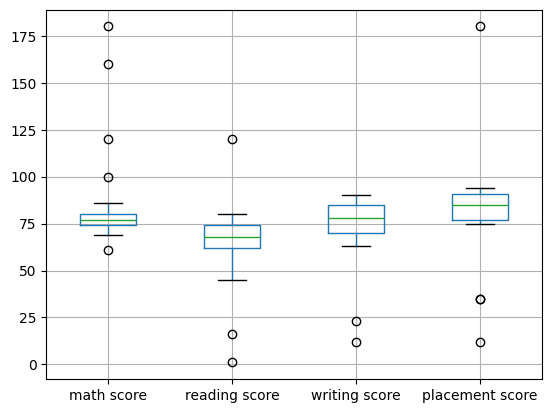

In [30]:
col = ['math score', 'reading score', 'writing score', 'placement score']
df.boxplot(col)

Imports the pyplot module from the matplotlib library
matplotlib.pyplot provides functions to create plots, charts, and graphs.

In [32]:
import matplotlib.pyplot as plt

Creates a figure and a subplot (ax) with a size of 18x10 inches.
Plots a scatter plot where:
    X-axis: placement score
    Y-axis: placement offer count
Displays the plot.

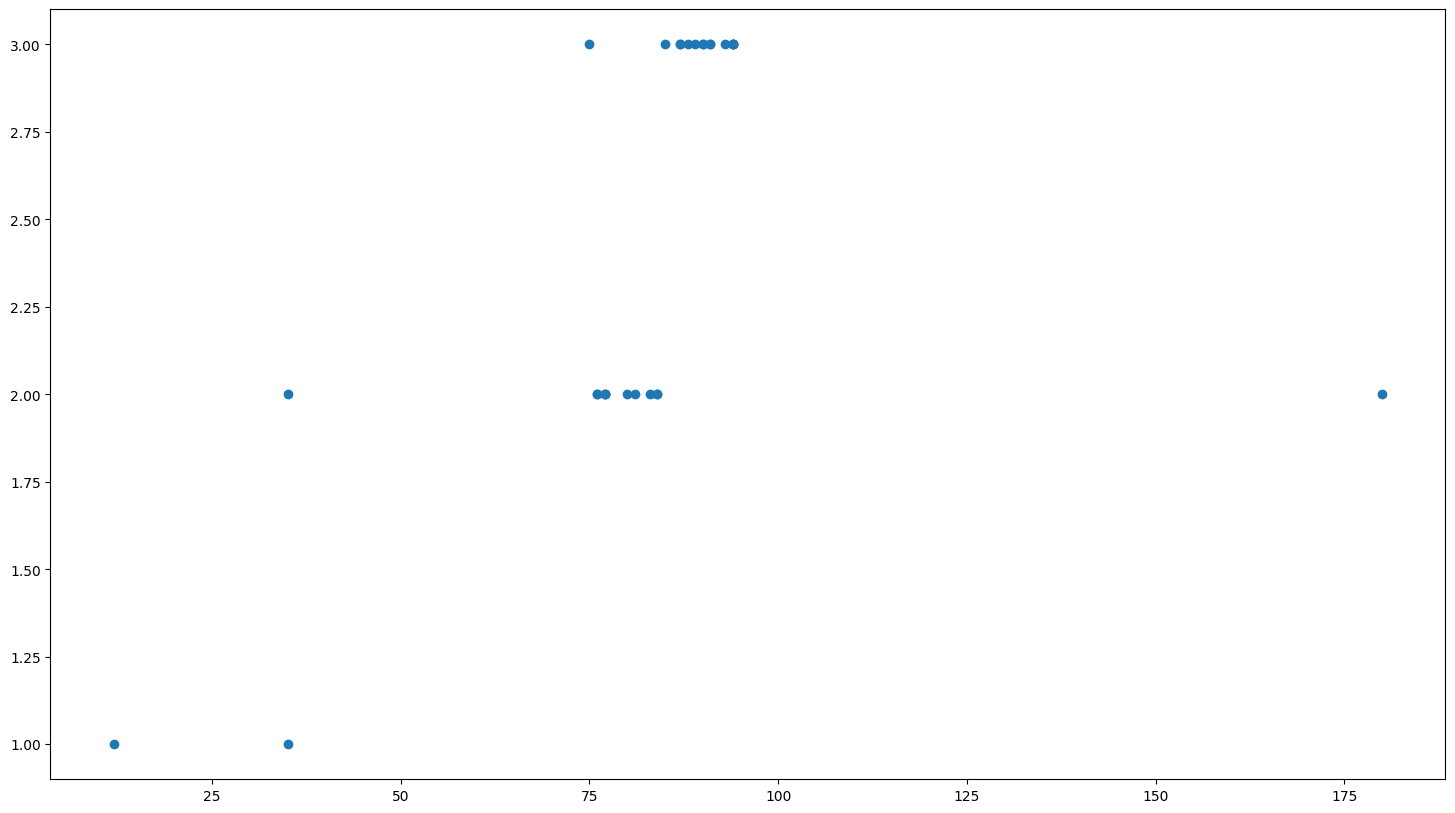

In [46]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['placement score'], df['placement offer count'])
plt.show()

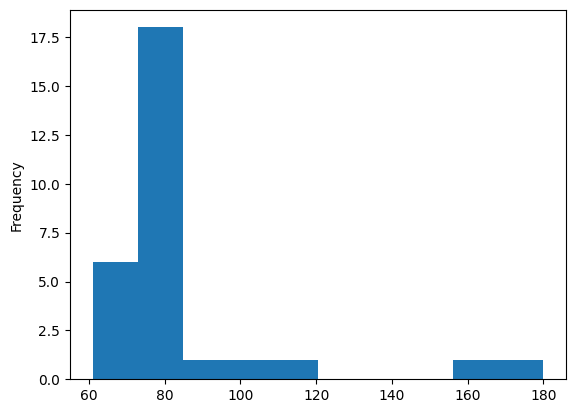

In [52]:
import matplotlib.pyplot as plt
df['math score'].plot(kind = 'hist')
plt.show()

Log Transformation is a technique used to reduce skewness in data by applying the logarithm function to the numerical values. It is especially useful when the data contains outliers or follows a skewed distribution, making it hard to model or visualize effectively.

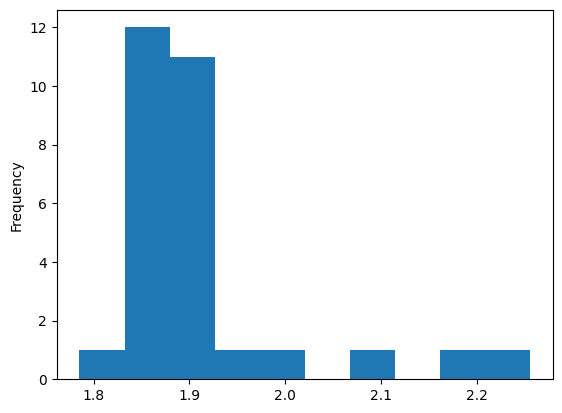

In [53]:

df['log_math'] = np.log10(df['math score'])
df['log_math'].plot(kind='hist')
plt.show()

In [ ]:
df['math score'].skew()  #skewness before transformation

np.float64(2.879976198725263)

In [ ]:
df['log_math'].skew()   #skewness after transformation

np.float64(2.416925142781312)